<a href="https://colab.research.google.com/github/AngelRosalesContreras/Practica_3_2/blob/main/Practica_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

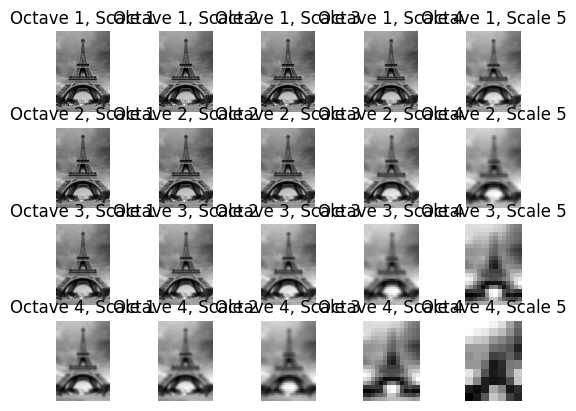

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def build_scale_space(image, num_octaves=4, num_scales=5, sigma=1.6):
    # Construir una pirámide de imágenes en diferentes escalas
    scale_space = []

    for octave in range(num_octaves):
        octave_images = []
        base = cv2.GaussianBlur(image, (0, 0), sigmaX=sigma)

        for scale in range(num_scales):
            octave_images.append(base)
            base = cv2.pyrDown(base)  # Submuestrear la imagen para la siguiente escala

        scale_space.append(octave_images)
        image = cv2.pyrDown(image)  # Submuestrear la imagen para la siguiente octava

    return scale_space

def visualize_scale_space(scale_space):
    for octave, images in enumerate(scale_space):
        for scale, image in enumerate(images):
            plt.subplot(len(scale_space), len(images), octave * len(images) + scale + 1)
            plt.imshow(image, cmap='gray')
            plt.title(f'Octave {octave + 1}, Scale {scale + 1}')
            plt.axis('off')

    plt.show()



# Cargar una imagen de ejemplo
image_path = 'uno.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Construir el espacio de escalas con parámetros personalizables
scale_space = build_scale_space(image, num_octaves=4, num_scales=5, sigma=1.6)

# Visualizar el espacio de escalas
visualize_scale_space(scale_space)
